<a href="https://colab.research.google.com/github/Bisalia/Crud_app/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
#sns.get_dataset_names()

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать тут.

Описание датасета:

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)
Необходимо решить задачу классификации и научиться предсказывать целовой признак target имеет ли пациент заболевание сердц

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


# ***Visualisation***

In [4]:
df['target'].value_counts(normalize=True)

1      0.513171
0      0.484878
0ss    0.001951
Name: target, dtype: float64

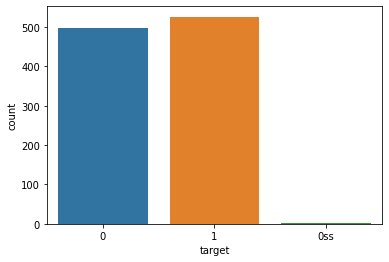

In [5]:
# мы находим 51%, у которых есть забалевание, 48% которых нет
sns.countplot(x='target', data=df)

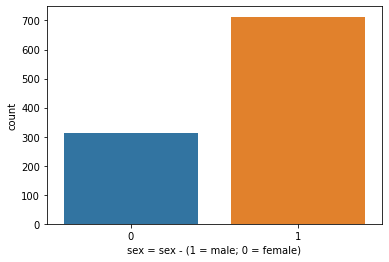

In [6]:
sns.countplot(x='sex', data=df)
plt.xlabel("sex = sex - (1 = male; 0 = female)")
plt.show()

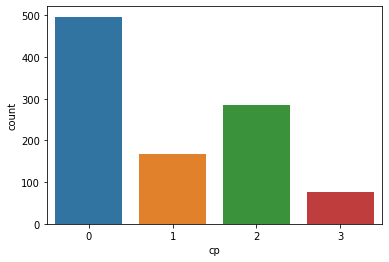

In [7]:
sns.countplot(x='cp', data=df)

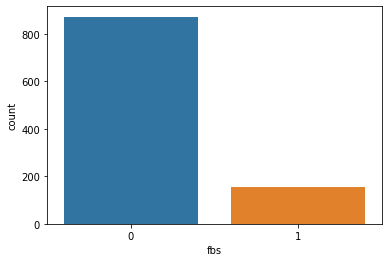

In [8]:
sns.countplot(x='fbs', data=df)
plt.show()

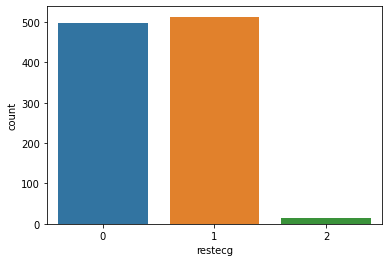

In [9]:
sns.countplot(x='restecg', data=df)
plt.show()

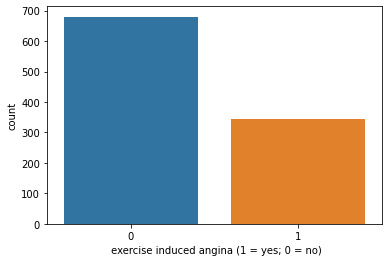

In [10]:
sns.countplot(x='exang', data=df)
plt.xlabel(' exercise induced angina (1 = yes; 0 = no)')
plt.show()

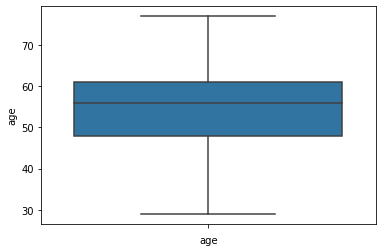

In [11]:
sns.boxplot(y='age', data=df)
plt.xlabel("age")
plt.show()

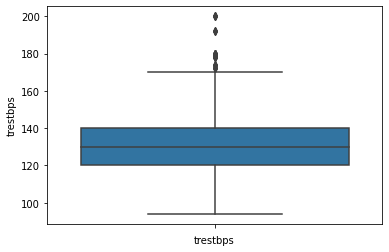

In [12]:
sns.boxplot(y='trestbps', data=df)
plt.xlabel("trestbps")
plt.show()

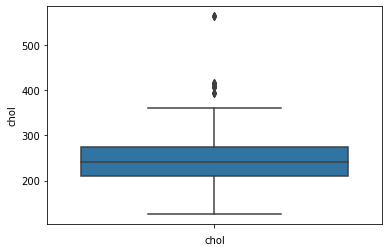

In [13]:
sns.boxplot(y='chol', data=df)
plt.xlabel("chol")
plt.show()

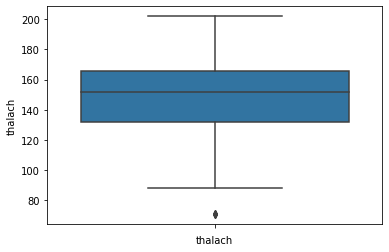

In [14]:
sns.boxplot(y='thalach', data=df)
plt.xlabel("thalach")
plt.show()

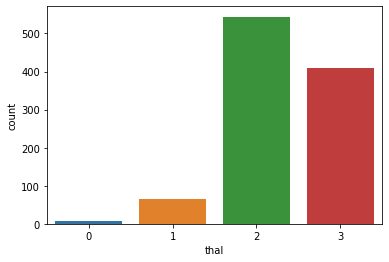

In [15]:
sns.countplot(x="thal", data=df)

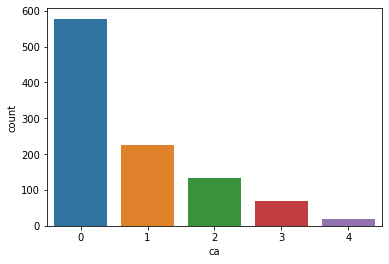

In [16]:
sns.countplot(x="ca", data=df)

In [17]:
pd.crosstab(df['age'], df['target'])

target,0,0ss,1
age,,,
29,0,0,4
34,0,0,6
35,7,0,8
37,0,0,6
38,4,0,8
39,4,0,10
40,8,0,3
41,3,0,29
42,4,0,22


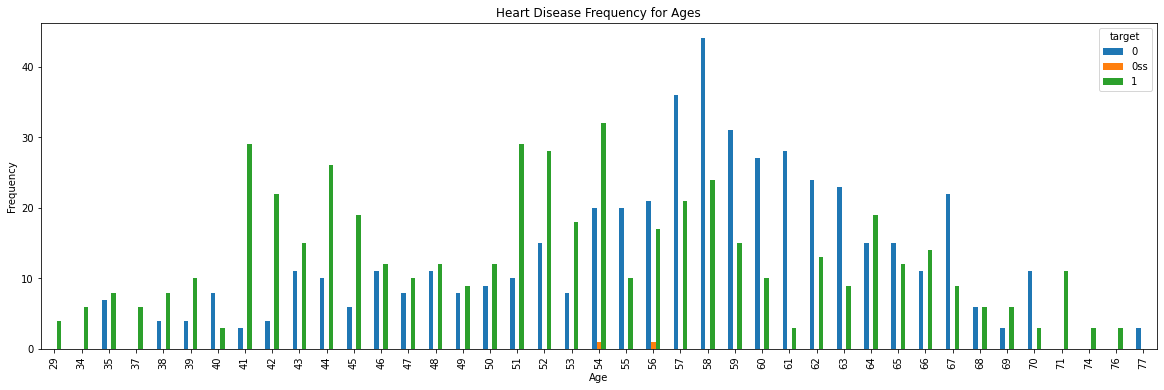

In [18]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
pd.crosstab(df['sex'], df['target'])

target,0,0ss,1
sex,,,
0,85,1,226
1,412,1,300


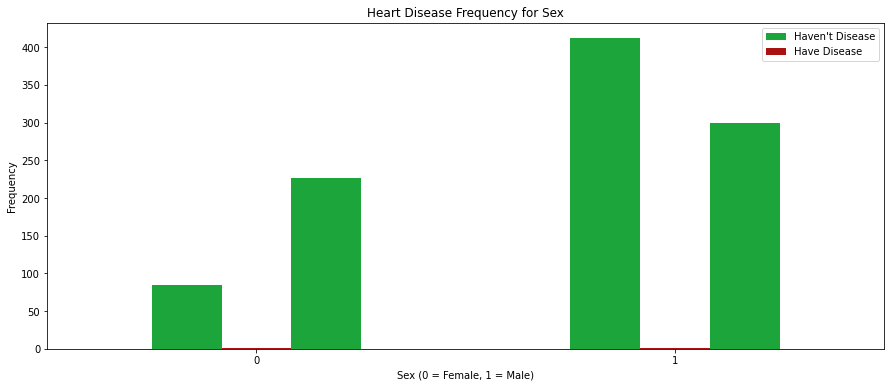

In [20]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [21]:
pd.crosstab(df['slope'], df['target'])

target,0,0ss,1
slope,,,
0,46,0,28
1,322,2,158
2,129,0,340


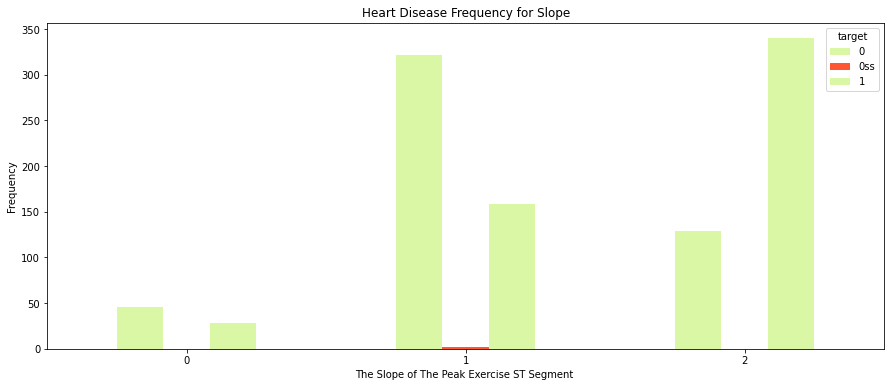

In [22]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

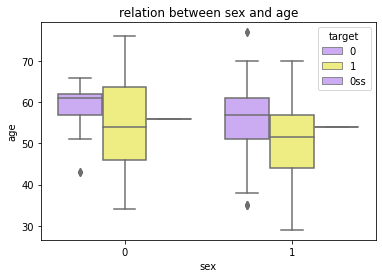

In [23]:
sns.boxplot(x='sex',data=df,hue='target',y='age', palette=sns.xkcd_palette(["pastel purple", "pastel yellow"]))
plt.title("relation between sex and age")
plt.xlabel('sex')
plt.ylabel('age')
plt.show()

In [24]:
pd.crosstab(df['fbs'], df['target'])

target,0,0ss,1
fbs,,,
0,415,2,455
1,82,0,71


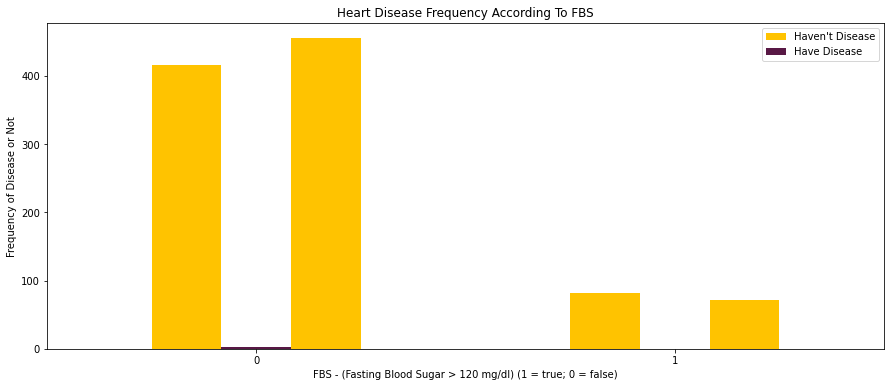

In [25]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [27]:
#target mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.575453,0.828974,0.484909,134.134809,251.102616,0.164990,0.456740,139.160966,0.549296,1.600000,1.167002,1.156942,2.537223
0ss,55.000000,0.500000,0.000000,127.000000,298.500000,0.000000,0.500000,131.500000,0.500000,1.650000,1.000000,1.500000,3.000000
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [28]:
df['oldpeak'].quantile(0.99)

4.3519999999999985

In [29]:
df['fbs'].quantile(0.99)

1.0

# **Data Cleaning**

In [30]:
#Column Type Check
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['column','dtype']
dtype_df.groupby(['dtype']).agg('count').reset_index()

,dtype,column
0,int64,12
1,float64,1
2,object,1


In [31]:
#Null Check
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / df.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio


there is no missing value in our dataset

In [33]:
#value Q1-105*IQR or value > Q3 + 1.5*IQR
def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr 
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [34]:
finding_outliers(df, 'trestbps').sort_values('trestbps')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
971,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
837,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
636,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
436,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
452,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
944,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
896,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [35]:
iqr_trestbps = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
df['trestbps'].quantile(0.75) + 1.5* iqr_trestbps

170.0

In [36]:
df.loc[(finding_outliers(df, 'trestbps').index, 'trestbps')] = df['trestbps'].quantile(0.75) + 1.5 * iqr_trestbps

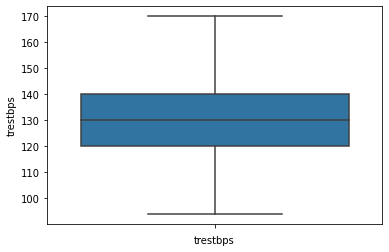

In [37]:
sns.boxplot(y='trestbps', data=df)
plt.xlabel("trestbps")
plt.show()



Eliminate outliers on trestbps

In [38]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


# **Transformation of categorical features**
 Let's encode the categorical features cp, thal and slope.

In [39]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [40]:
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['sex'] = le.fit_transform(df['sex'])
df['trestbps'] = le.fit_transform(df['trestbps'])
df['fbs	'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['thalach	'] = le.fit_transform(df['thalach'])
df['exang'] = le.fit_transform(df['exang'])
df['oldpeak'] = le.fit_transform(df['oldpeak'])

In [41]:

df['target'] = le.fit_transform(df['target'])

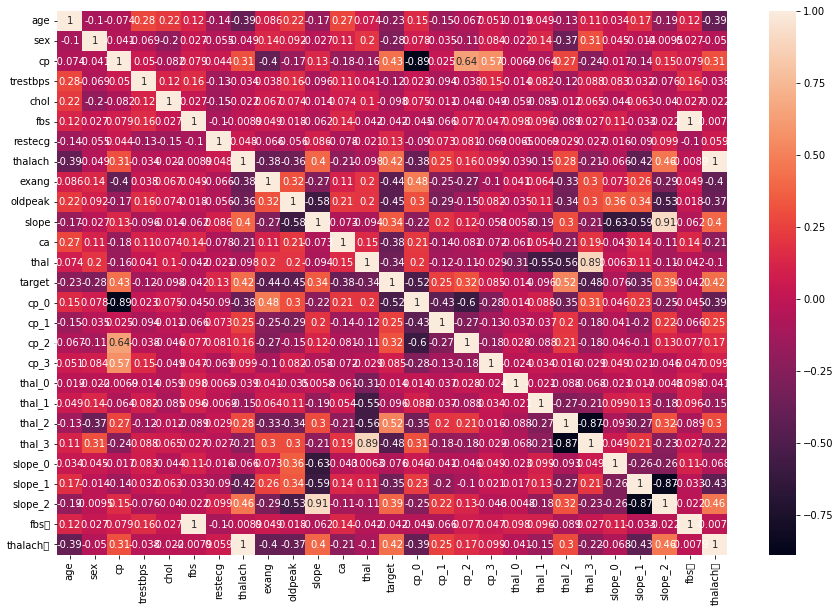

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.show()

In [43]:
X = df.drop(['target'], axis=1)
y = df['target']

In [44]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [45]:
# Splitting dataset into training and testing split with 70-30% ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [46]:

# K-fold splits

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

# ***MODELLING***

In [47]:
params = {
    'penalty': ['l1','l2'],
    'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
}

# Building model
logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(logreg, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)


In [49]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

Logistic Regression

In [50]:
logreg_grid_val_score = grid.best_score_
print('Best Score:', logreg_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)


Best Score: 0.8532407407407409
Best Params: {'C': 8, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=8, solver='liblinear')


In [51]:
logreg_grid = grid.best_estimator_
y_pred = logreg_grid.predict(X_test)

In [52]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=[0, 1] )

,Predicted 0,Predicted 1
0,119,26
1,21,142


In [53]:
logreg_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', logreg_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.8474025974025974
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       145
           2       0.85      0.87      0.86       163

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



# ***K-Nearest Neighbor Classifier(KNN)***

In [55]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance']
}

# Building model
knn = KNeighborsClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(knn, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [56]:
knn_grid_val_score = grid.best_score_
print('Best Score:', knn_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.9578703703703704
Best Params: {'n_neighbors': 19, 'weights': 'distance'}
Best Estimator: KNeighborsClassifier(n_neighbors=19, weights='distance')


In [59]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

knn_grid= grid.best_estimator_
y_pred = knn_grid.predict(X_test)

In [62]:
 #Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=[0,1] )

,Predicted 0,Predicted 1
0,142,3
1,0,163


In [63]:
# Calculating metrics

knn_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', knn_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.9902597402597403
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           2       0.98      1.00      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



# ***Gaussian Naive Bayes***

In [65]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# No such parameters for Gaussian Naive Bayes
params = {}

# Building model
gb = GaussianNB()

# Parameter estimating using GridSearch
grid = GridSearchCV(gb, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='accuracy', verbose=1)

In [66]:
gb_grid_val_score = grid.best_score_
print('Best Score:', gb_grid_val_score)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.8300925925925926
Best Estimator: GaussianNB()


In [67]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

gb_grid= grid.best_estimator_
y_pred = gb_grid.predict(X_test)

In [70]:
# Calculating metrics

gb_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', gb_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))



Model Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.54      0.65       145
           1       0.00      0.00      0.00         0
           2       0.85      0.85      0.85       163

    accuracy                           0.71       308
   macro avg       0.55      0.47      0.50       308
weighted avg       0.82      0.71      0.75       308



# ***Support Vector Machines***

In [71]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma' : [0.001,0.001, 0.01, 0.1, 1]
}

# Building model
svc = SVC(kernel='rbf', probability=True) ## 'rbf' stands for gaussian kernel

# Parameter estimating using GridSearch
grid = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=1)

In [72]:
svm_grid_val_score = grid.best_score_
print('Best Score:', svm_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.9550925925925927
Best Params: {'C': 10, 'gamma': 0.1}
Best Estimator: SVC(C=10, gamma=0.1, probability=True)


In [73]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

svm_grid= grid.best_estimator_
y_pred = svm_grid.predict(X_test)

In [75]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=[0,1] )

,Predicted 0,Predicted 1
0,145,0
1,6,157


In [76]:
svm_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', svm_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.9805194805194806
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       145
           2       1.00      0.96      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



# ***Decision Tree Classifier***

In [77]:
# Building our model with K-fold validation and GridSearch to find the best parameters

# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

# Building model
dtc = DecisionTreeClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', n_jobs =-1, cv=cv, verbose=1)

# Fitting the model
grid.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [78]:
dtc_grid_val_score = grid.best_score_
print('Best Score:', dtc_grid_val_score)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.9541666666666666
Best Params: {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_features=10)


In [79]:
# Using the best parameters from the grid-search and predicting on test feature dataset(X_test)

dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(X_test)

In [80]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns=["Predicted 0", "Predicted 1"], index=[0 ,1] )

,Predicted 0,Predicted 1
0,142,3
1,3,160


In [81]:
dtc_grid_score = accuracy_score(y_test, y_pred)
print('Model Accuracy:', dtc_grid_score)
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.9805194805194806
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       145
           2       0.98      0.98      0.98       163

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



# ***RESULTS***

In [83]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_grid_score, logreg_grid_val_score],
        ['K-Nearest Neighbors', knn_grid_score, knn_grid_val_score],
        ['Gaussian Naïve Bayes', gb_grid_score, gb_grid_val_score],
        ['Support Vector Machines', svm_grid_score, svm_grid_val_score],
        ['Decision Tree Classifier', dtc_grid_score, dtc_grid_val_score],
         
    ],
    columns= ['Model', 'Test Score', 'Validation Score']
)
score_df['Test Score'] = score_df['Test Score']*100
score_df['Validation Score'] = score_df['Validation Score']*100

In [85]:
score_df

,Model,Test Score,Validation Score
0,Logistic Regression,84.740260,85.324074
1,K-Nearest Neighbors,99.025974,95.787037
2,Gaussian Naïve Bayes,70.779221,83.009259
3,Support Vector Machines,98.051948,95.509259
4,Decision Tree Classifier,98.051948,95.416667


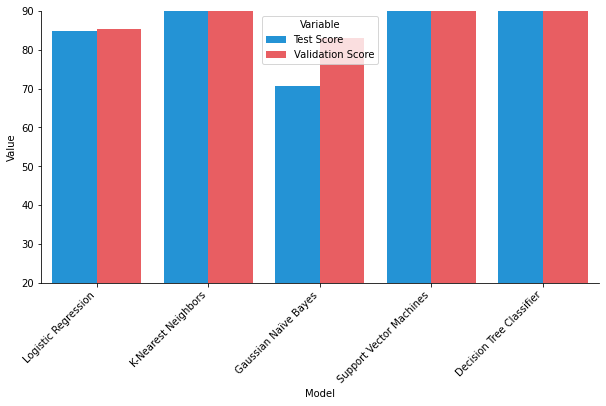

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = score_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy, ax=ax1, palette=sns.xkcd_palette(["azure", "light red"]))
plt.ylim(20, 90)
plt.xticks(rotation=45, horizontalalignment="right")
sns.despine(fig)